## 对数几率回归

考虑二分类的问题，对于二分类问题只有0和1，因此需要将结果映射为0和1即可，常用的函数为 sigmod函数

In [1]:
# 导入需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris,make_classification

%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
sigmoid = lambda x:1./(1+np.exp(-x))   # 定义sigmod 匿名函数

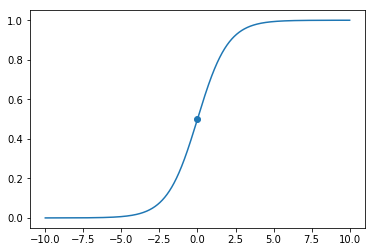

In [3]:
x = np.linspace(-10,10,10000)
y = sigmoid(x)
plt.plot(x,y)
plt.scatter(0,sigmoid(0))

In [5]:
# 读取数据
data = load_iris()
X = data.data[data.target != 0]
y = data.target[data.target != 0]
y[y == 1] = 0
y[y == 2] = 0

Y = y.reshape(-1,1)

In [6]:
X[:5],Y[:5]

(array([[ 7. ,  3.2,  4.7,  1.4],
        [ 6.4,  3.2,  4.5,  1.5],
        [ 6.9,  3.1,  4.9,  1.5],
        [ 5.5,  2.3,  4. ,  1.3],
        [ 6.5,  2.8,  4.6,  1.5]]), array([[0],
        [0],
        [0],
        [0],
        [0]]))

## 定义对数几率回归的梯度下降解法

* 根据西瓜书中的说法，逻辑回归是不怎么准确的，应该使用对数几率回归，简称对数回归

In [7]:
class LogisticRegression(object):
    def __init__(self):
        self.sigmoid = lambda x:1./(1+np.exp(-x))
    def fit(self, X, y):
        self.w = np.random.randn(X.shape[1],1)
        for _ in range(1000):
            y_pred = self.sigmoid(X @ self.w)
            self.w -= 0.01 * X.T @ (y_pred - y) #梯度下降
            print(np.mean(0.5*(y_pred- y)**2))
    def predict(self,X):
        y_pred = np.round(self.sigmoid(X.dot(self.w)))
        return y_pred

In [8]:
lr = LogisticRegression()

In [9]:
lr.fit(X,Y)

0.0590560277741
2.98271756069e-19
2.98271750768e-19
2.98271745468e-19
2.98271740167e-19
2.98271734866e-19
2.98271729565e-19
2.98271724265e-19
2.98271718964e-19
2.98271713663e-19
2.98271708363e-19
2.98271703062e-19
2.98271697761e-19
2.9827169246e-19
2.9827168716e-19
2.98271681859e-19
2.98271676558e-19
2.98271671258e-19
2.98271665957e-19
2.98271660656e-19
2.98271655355e-19
2.98271650055e-19
2.98271644754e-19
2.98271639453e-19
2.98271634153e-19
2.98271628852e-19
2.98271623551e-19
2.9827161825e-19
2.9827161295e-19
2.98271607649e-19
2.98271602348e-19
2.98271597048e-19
2.98271591747e-19
2.98271586446e-19
2.98271581145e-19
2.98271575845e-19
2.98271570544e-19
2.98271565243e-19
2.98271559943e-19
2.98271554642e-19
2.98271549341e-19
2.9827154404e-19
2.9827153874e-19
2.98271533439e-19
2.98271528138e-19
2.98271522838e-19
2.98271517537e-19
2.98271512236e-19
2.98271506935e-19
2.98271501635e-19
2.98271496334e-19
2.98271491033e-19
2.98271485733e-19
2.98271480432e-19
2.98271475131e-19
2.9827146983e-19
2

2.98266990782e-19
2.98266985482e-19
2.98266980181e-19
2.9826697488e-19
2.9826696958e-19
2.98266964279e-19
2.98266958979e-19
2.98266953678e-19
2.98266948378e-19
2.98266943077e-19
2.98266937776e-19
2.98266932476e-19
2.98266927175e-19
2.98266921875e-19
2.98266916574e-19
2.98266911273e-19
2.98266905973e-19
2.98266900672e-19
2.98266895372e-19
2.98266890071e-19
2.98266884771e-19
2.9826687947e-19
2.98266874169e-19
2.98266868869e-19
2.98266863568e-19
2.98266858268e-19
2.98266852967e-19
2.98266847666e-19
2.98266842366e-19
2.98266837065e-19
2.98266831765e-19
2.98266826464e-19
2.98266821163e-19
2.98266815863e-19
2.98266810562e-19
2.98266805262e-19
2.98266799961e-19
2.98266794661e-19
2.9826678936e-19
2.98266784059e-19
2.98266778759e-19
2.98266773458e-19
2.98266768158e-19
2.98266762857e-19
2.98266757557e-19
2.98266752256e-19
2.98266746955e-19
2.98266741655e-19
2.98266736354e-19
2.98266731054e-19
2.98266725753e-19
2.98266720452e-19
2.98266715152e-19
2.98266709851e-19
2.98266704551e-19
2.9826669925e-

In [10]:
y_pred = lr.predict(X)
accuracy = np.sum(Y == y_pred, axis=0) / len(Y)

In [11]:
print('predict acc %s'%accuracy[0])

predict acc 1.0
